<h1>第一部份</h1>

In [8]:
import pandas as pd

# 讀取CSV文件
df = pd.read_csv("C:\\Users\\Modern 14\\Desktop\\codementorTest\\person\\fn01_table_person__merged_output.csv")
# df = pd.read_csv(r"C:\pythonpractice\thesis\link_0ibrahimyilmaz.csv")
# df.fillna(0, inplace=True)

# 篩選出評論數大於等於29的鏈接################
link_counts = df['link'].value_counts()
df = df[df['link'].isin(link_counts[link_counts >= 20].index)]
############################################


# 將日期格式轉換為datetime
df['time'] = pd.to_datetime(df['time'])
############################################
# 將日期修改為該月的第一天
df['time'] = df['time'].dt.to_period('M').dt.to_timestamp()
############################################

############################################
# 找到所有缺失的鏈接
zero_review_links = df.groupby('link')['p_job'].apply(lambda x: x.isnull().all() or x.nunique() == 1)
zero_review_links.sort_index(inplace=True)

# 剔除所有評論都為零的鏈接
df = df[~df['link'].isin(zero_review_links[zero_review_links].index)]
# df=(df.set_index('time')
#    .groupby('link', as_index=False)
#    .apply(lambda d: d.reindex(pd.date_range(d.index.min(), d.index.max(), freq='MS')))
#    .interpolate(method='linear')
#    .ffill()
#    .reset_index(level=0, drop=True)
# )

df = df.set_index(['link', 'time'])

# 重新索引以填充缺失的時間點
idx = pd.MultiIndex.from_product([df.index.levels[0], pd.date_range(df.index.levels[1].min(), df.index.levels[1].max(), freq='MS')])
df = df.reindex(idx)

# 使用前一個非空值填充缺失的值
df = df.bfill()


df.reset_index(inplace=True)
# df.rename(columns = {'index':'time'}, inplace = True) ##20240410
df.rename(columns = {'level_1':'time'}, inplace = True) 


In [9]:
df[df['link']=='/@kosicn']

,link,time,p_picture_label,p_star,p_review,p_money,p_job,p_message_label_count,p_message_First_15,p_message_Featured_Mentor,p_message_Facebook
26158,/@kosicn,2021-02-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26159,/@kosicn,2021-03-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26160,/@kosicn,2021-04-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26161,/@kosicn,2021-05-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26162,/@kosicn,2021-06-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26163,/@kosicn,2021-07-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,2.0,1.0,1.0,0.0,0.0
26164,/@kosicn,2021-08-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,3.0,1.0,1.0,0.0,0.0
26165,/@kosicn,2021-09-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,10.0,3.0,1.0,1.0,0.0,0.0
26166,/@kosicn,2021-10-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,15.0,3.0,1.0,1.0,0.0,0.0
26167,/@kosicn,2021-11-01,https://ucarecdn.com/bd7117a8-30d6-4958-aad1-d...,5.0,1.0,15.0,6.0,1.0,1.0,0.0,0.0


<h1 align = 'center'>計算基數與成長差距 </h1>

In [10]:
from scipy.stats import gmean


# Step 1: 計算每個連結的第一期
first_period_p_job = df[df.groupby('link')['time'].transform('min') == df['time']][['link', 'p_job']]
first_period_p_job.rename(columns={'p_job': 'first_period_p_job'}, inplace=True)

# Step 2: 計算每個連結的 p_job 最後一期與第一期的差距

p_job_diff = df.groupby('link')['p_job'].apply(lambda x: (x.iloc[-1] - x.iloc[0])).reset_index()
p_job_diff.columns = ['link', 'p_job_diff']
result_df = pd.merge(first_period_p_job, p_job_diff, on='link')


# # Step 3: 計算每個連結的 p_job 成長率
# p_job_growthRate = df.groupby('link')['p_job'].apply(lambda x: (x.iloc[-1] - x.iloc[0])/x.iloc[0]).reset_index()
# p_job_growthRate.columns = ['link', 'p_job_growthRate']
# result_df = pd.merge(first_period_p_job, p_job_growthRate, on='link')


## Step 6: 篩選出 p_job_diff 大於等於0的連結
result_df=result_df[result_df['p_job_diff'] >=1]



In [11]:
result_df[result_df['link'] =='/@kosicn']

,link,first_period_p_job,p_job_diff
902,/@kosicn,2.0,8.0


In [12]:
first_period_p_job[first_period_p_job['link'] =='/@kosicn']

,link,first_period_p_job
26158,/@kosicn,2.0


In [13]:
# result_df[result_df['link'] == '/@a.k']   

result_df.sort_values(by='p_job_diff', ascending=False, inplace=True)
result_df

,link,first_period_p_job,p_job_diff
477,/@e4c5,3154.0,1892.0
862,/@kalaiselvid,52.0,1729.0
1303,/@rajharajesuwari,1581.0,1676.0
351,/@coffeetocode,1377.0,1582.0
1524,/@stefangeorg,2398.0,1401.0
...,...,...,...
524,/@evereq,11.0,1.0
1065,/@michaelzomparelli614,4.0,1.0
1528,/@stephenbunch,11.0,1.0
1322,/@raymondarteagasanchez,1.0,1.0


<h1 align ='center'>畫出成長數量散布圖</h1>

c:\Users\Modern 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


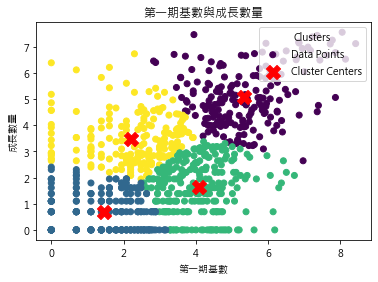

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

result_df['p_job_diff'] = np.where(result_df['p_job_diff'] <= 0, np.nan, result_df['p_job_diff'])
# 對 'p_job_first' 列取對數，NaN 將被保留為 NaN
result_df['log_p_job_diff'] = np.log(result_df['p_job_diff'])


# 對 'p_job_first' 列取對數
result_df['log_p_job_first'] = np.log(result_df['first_period_p_job'])


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# selected_features = ['p_star', 'p_review', 'p_money', 'p_job', 'p_message_label_count', 'p_message_First_15', 'p_message_Featured_Mentor', 'p_message_Facebook', 'review_growth_per_link', 'percentile_rank']
selected_features = ['log_p_job_first','log_p_job_diff']

# K-means叢集分析
kmeans = KMeans(n_clusters=4, random_state=42)
result_df['cluster'] = kmeans.fit_predict(result_df[selected_features])

# 繪製散點圖
centers = kmeans.cluster_centers_
plt.scatter(result_df['log_p_job_first'], result_df['log_p_job_diff'], c=result_df['cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.xlabel('第一期基數')
plt.ylabel('成長數量')

plt.title('第一期基數與成長數量')
# plt.xlabel('percentile_rank')
# plt.ylabel('review_growth_per_link (Standardized)')
plt.legend(title='Clusters', loc='upper right')
plt.show()



c:\Users\Modern 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


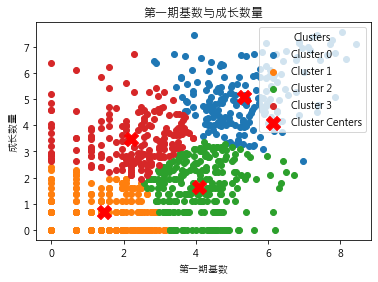

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

result_df['p_job_diff'] = np.where(result_df['p_job_diff'] <= 0, np.nan, result_df['p_job_diff'])
# 对 'p_job_first' 列取对数，NaN 将被保留为 NaN
result_df['log_p_job_diff'] = np.log(result_df['p_job_diff'])

# 对 'p_job_first' 列取对数
result_df['log_p_job_first'] = np.log(result_df['first_period_p_job'])

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 选取特征
selected_features = ['log_p_job_first','log_p_job_diff']

# K-means聚类分析
kmeans = KMeans(n_clusters=4, random_state=42)
result_df['cluster'] = kmeans.fit_predict(result_df[selected_features])

# 绘制散点图
centers = kmeans.cluster_centers_
for cluster_label in range(4):
    cluster_data = result_df[result_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['log_p_job_first'], cluster_data['log_p_job_diff'], label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.xlabel('第一期基数')
plt.ylabel('成长数量')

plt.title('第一期基数与成长数量')
plt.legend(title='Clusters', loc='upper right')
plt.show()


<h1 align="center">標準化後結果</h1>

c:\Users\Modern 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


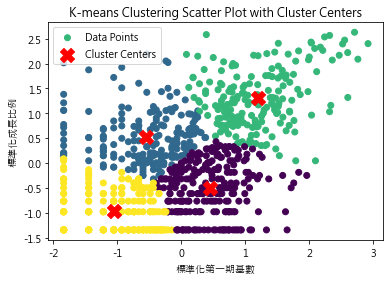

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 選擇要標準化的特徵
selected_features = ['log_p_job_first', 'log_p_job_diff']

# 創建 StandardScaler 對象
scaler = StandardScaler()

# 對選擇的特徵進行標準化
scaled_features = scaler.fit_transform(result_df[selected_features])

# K-means叢集分析
kmeans = KMeans(n_clusters=4, random_state=42)
result_df['cluster'] = kmeans.fit_predict(scaled_features)

# 繪製散點圖
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=result_df['cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering Scatter Plot with Cluster Centers')
plt.xlabel('標準化第一期基數')
plt.ylabel('標準化成長比例')
plt.legend()
plt.show()


<h1 align="center">-----------------分隔線--------------------</h1>

In [18]:
import pandas as pd

import numpy as np
# 讀取CSV文件
# df = pd.read_csv("C:\\Users\\Modern 14\\Desktop\\codementorTest\\person\\fn01_table_person__merged_output.csv")
df = pd.read_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\merged_output.csv")

#*******修改********
# 篩選出評論數大於等於20的鏈接
link_counts = df['link'].value_counts()
df = df[df['link'].isin(link_counts[link_counts >= 10].index)]

# 將日期格式轉換為datetime
df['time'] = pd.to_datetime(df['time'])

# 將日期修改為該月的第一天
df['time'] = df['time'].dt.to_period('M').dt.to_timestamp()

# 找到所有缺失的鏈接
zero_review_links = df.groupby('link')['p_job'].apply(lambda x: x.isnull().all() or x.nunique() == 1)
zero_review_links.sort_index(inplace=True)

# 剔除所有評論都為零的鏈接
df = df[~df['link'].isin(zero_review_links[zero_review_links].index)]

# # 重新索引並填充缺失值
# df = (df.set_index('time')
#       .groupby('link', as_index=False)
#       .apply(lambda d: d.reindex(pd.date_range(d.index.min(), d.index.max(), freq='MS')))
#       .interpolate(method='linear')
#       .ffill()
#       .reset_index(level=0, drop=True)
# )
# # 重設索引
# df.reset_index(inplace=True)
# df.rename(columns={'index': 'time'}, inplace=True)


df = df.set_index(['link', 'time'])

# 重新索引以填充缺失的時間點
idx = pd.MultiIndex.from_product([df.index.levels[0], pd.date_range(df.index.levels[1].min(), df.index.levels[1].max(), freq='MS')])
df = df.reindex(idx)

# 使用前一個非空值填充缺失的值
df = df.bfill()

df.reset_index(inplace=True)
# df.rename(columns = {'index':'time'}, inplace = True) ##20240410
df.rename(columns = {'level_1':'time'}, inplace = True) 


# 創建一個字典來儲存每個數值型變數的第一期值和最後一期值
diff_dict = {}

## 獲取 p_job 的第一期和最後一期的值
first_value = df.groupby('link')['p_job'].first()
last_value = df.groupby('link')['p_job'].last()
diff_dict['p_job' + '_first'] = first_value
diff_dict['p_job' + '_diff'] = (last_value - first_value)
############################################

## 獲取 p_star, p_review, p_money 的 max-min 差值
growth_columns = ['p_star', 'p_review', 'p_money', 'em_count', 'ex_count', 'pro_count', 're_count', 'a_headline_count', 'headline_readability', 'a_about_count', 'about_readability']

for col in growth_columns:
    max_value = df.groupby('link')[col].max()
    min_value = df.groupby('link')[col].min()
    avg_value = df.groupby('link')[col].mean()
    first_value = df.groupby('link')[col].first()
    diff_dict[col + '_diff'] = (max_value - min_value)
    diff_dict[col + '_avg'] = avg_value
    diff_dict[col + '_first'] = first_value
############################################

## 獲取其他數值型變數的最大值   
numeric_columns = df.select_dtypes(include='number').columns.tolist()
remove_columns = ['p_job','p_star', 'p_review', 'p_money', 'em_count', 'ex_count', 'pro_count', 're_count', 'a_headline_count', 'headline_readability', 'a_about_count', 'about_readability']

for col in remove_columns:
    numeric_columns.remove(col)
for col in numeric_columns:
    max_value = df.groupby('link')[col].max()
    diff_dict[col] = (max_value)
############################################
    

## 計算每個變數的第一期和最後一期的差距、增長率
# for col in numeric_columns:
#     first_value = df.groupby('link')[col].first()
#     last_value = df.groupby('link')[col].last()
#     diff_dict[col + '_diff'] = (last_value - first_value)
#     # diff_dict[col + '_first'] = first_value
#     # diff_dict[col + '_growth'] = (last_value - first_value) / first_value
############################################
    


# 將字典轉換為DataFrame
diff_df = pd.DataFrame(diff_dict).reset_index()

# 對 'p_job_first' 和 'p_job_diff' 列取對數
diff_df[['log_p_job_first', 'log_p_job_diff']] = np.log(diff_df[['p_job_first', 'p_job_diff']])

# 重命名列名
diff_df.rename(columns={'index': 'link'}, inplace=True)

#*******修改********
# 篩選出 p_job_diff 大於等於0的連結
diff_df = diff_df[diff_df['p_job_diff'] >= 0]


C:\Users\Modern 14\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Modern 14\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [16]:
# diff_df['log_p_job_diff'].describe()
# 858
# 891
# 901


check area

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




# 提取需要用於聚類的特徵
X = diff_df[['log_p_job_first', 'log_p_job_diff']]

# 創建 K-means 聚類器
kmeans = KMeans(n_clusters=4, random_state=42)

# 進行聚類
diff_df['cluster'] = kmeans.fit_predict(X)

# 繪製聚類結果的散點圖
plt.scatter(diff_df['log_p_job_first'], diff_df['log_p_job_diff'], c=diff_df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Cluster Analysis of p_job_first vs p_job_diff')
plt.xlabel('p_job_first')
plt.ylabel('p_job_diff')
plt.legend()
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 創建填充器
X = diff_df[['log_p_job_first', 'log_p_job_diff']]
imputer = SimpleImputer(strategy='mean')

# 填充NaN值
X_filled = imputer.fit_transform(X)

# 創建 K-means 聚類器
kmeans = KMeans(n_clusters=4, random_state=42)

# 進行聚類
cluster_labels = kmeans.fit_predict(X_filled)

# 繪製聚類結果的散點圖
plt.scatter(X_filled[:, 0], X_filled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Cluster Analysis of p_job_first vs p_job_diff')
plt.xlabel('p_job_first')
plt.ylabel('p_job_diff')
plt.legend()
plt.show()

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [20]:
diff_df['p_job_diff'].describe()

count     858.000000
mean       80.039627
std       211.173928
min         1.000000
25%         3.000000
50%        11.000000
75%        51.750000
max      1892.000000
Name: p_job_diff, dtype: float64

In [21]:
diff_df.columns.tolist()

['link',
 'p_job_first',
 'p_job_diff',
 'p_star_diff',
 'p_star_avg',
 'p_star_first',
 'p_review_diff',
 'p_review_avg',
 'p_review_first',
 'p_money_diff',
 'p_money_avg',
 'p_money_first',
 'em_count_diff',
 'em_count_avg',
 'em_count_first',
 'ex_count_diff',
 'ex_count_avg',
 'ex_count_first',
 'pro_count_diff',
 'pro_count_avg',
 'pro_count_first',
 're_count_diff',
 're_count_avg',
 're_count_first',
 'a_headline_count_diff',
 'a_headline_count_avg',
 'a_headline_count_first',
 'headline_readability_diff',
 'headline_readability_avg',
 'headline_readability_first',
 'a_about_count_diff',
 'a_about_count_avg',
 'a_about_count_first',
 'about_readability_diff',
 'about_readability_avg',
 'about_readability_first',
 'p_message_label_count',
 'p_message_First_15',
 'p_message_Featured_Mentor',
 'p_message_Facebook',
 'video',
 'language_eng',
 'language_hindi',
 'c',
 'social_link_count',
 'github_label',
 'stackoverflow_label',
 'twitter_label',
 'linkedin_label',
 'log_p_job_firs

In [22]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # 提取需要用於聚類的特徵
# X = diff_df[['log_p_job_first', 'log_p_job_diff']]

# # 初始化空列表來存儲WCSS值
# wcss = []

# # 設定一系列的群數
# num_clusters = range(1, 6)

# # 對於每個群數，計算相應的WCSS值
# for n in num_clusters:
#     kmeans = KMeans(n_clusters=n, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# # 繪製群數和WCSS值之間的折線圖
# plt.plot(num_clusters, wcss, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()


In [23]:
# new_df = diff_df[['link', 'p_job_diff']].copy()
# new_df.to_csv('C:\\Users\\Modern 14\\Desktop\\codementorAll\\test\\p_job_diff.csv', index=False)

建立3種不同的 social capital dataframe

In [24]:
##建立embodied_df 
embodied_column = ['link', 'p_message_label_count', 'a_headline_count_diff', 'headline_readability_diff', 'a_about_count_diff','about_readability_diff','language_eng','language_hindi','c','cluster']
diff_columns = [col for col in embodied_column if col.endswith('_diff')]
for col_diff in diff_columns:
    col_first = col_diff.replace('_diff', '_first')
    embodied_column.append(col_first)
    # col_avg = col_diff.replace('_diff', '_avg')
    # embodied_column.append(col_avg)
    embodied_column = [col for col in embodied_column if not col.endswith('_diff')]
embodied_df = diff_df[embodied_column].copy()
embodied_df = embodied_df.reindex(sorted(embodied_df.columns), axis=1)
############################################

##建立objectified_df
objectified_column = ['link', 'p_star_diff', 'p_review_diff', 'p_money_diff', 'em_count_diff', 'ex_count_diff', 'pro_count_diff', 're_count_diff','cluster']
diff_columns = [col for col in objectified_column if col.endswith('_diff')]
for col_diff in diff_columns:
    col_first = col_diff.replace('_diff', '_first')
    objectified_column.append(col_first)
    objectified_column = [col for col in objectified_column if not col.endswith('_diff')]
    # col_avg = col_diff.replace('_diff', '_avg')
    # objectified_column.append(col_avg)
objectified_df = diff_df[objectified_column].copy()

objectified_df = objectified_df.reindex(sorted(objectified_df.columns), axis=1)
############################################

##建立merged_df
#20240411
institutionalized_column = ['link','p_message_First_15' ,'p_message_Featured_Mentor', 'p_message_Facebook','social_link_count','stackoverflow_label','github_label','twitter_label','linkedin_label','p_job_diff','p_job_first','cluster']
#20240410
# institutionalized_column = ['link','p_message_First_15' ,'p_message_Featured_Mentor', 'p_message_Facebook','social_link_count','stackoverflow_label','github_label','twitter_label','linkedin_label','p_job_diff','cluster']
# diff_columns = [col for col in institutionalized_column if col.endswith('_diff')]
# for col_diff in diff_columns:
#     col_first = col_diff.replace('_diff', '_first')
#     institutionalized_column.append(col_first)
#     col_avg = col_diff.replace('_diff', '_avg')
#     institutionalized_column.append(col_avg)
institutionalized_df = diff_df[institutionalized_column].copy()


In [25]:
# diff_df.sort_values(by='log_p_job_diff', ascending=False, inplace=True)
# diff_df
# diff_df.to_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\diff_df.csv", index=False)

(Xt-X1)/X1群集分析

In [26]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # 選擇要使用的特徵
# selected_features = ['log_p_job_first', 'log_p_job_growth']

# # K-means叢集分析
# kmeans = KMeans(n_clusters=4, random_state=42)
# diff_df['cluster'] = kmeans.fit_predict(diff_df[selected_features])

# # 繪製散點圖
# plt.scatter(diff_df['log_p_job_first'], diff_df['log_p_job_growth'], c=diff_df['cluster'], cmap='viridis', label='Data Points')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# plt.title('成長率與第一期基數的K-means叢集分析')
# plt.xlabel('第一期基數')
# plt.ylabel('成長率')
# plt.legend()
# plt.show()


In [27]:
# diff_df[diff_df['link'] == '/@a.k']   
# temp = diff_df.sort_values(by='p_job_growth', ascending=True)
# temp

成長率幾何平均 群集分析

In [28]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# plt.rcParams['axes.unicode_minus'] = False

# # 選擇要使用的特徵
# selected_features = ['log_p_job_first', 'log_geo_mean_growth_rate']


# # K-means叢集分析
# kmeans = KMeans(n_clusters=4, random_state=42)
# diff_df['cluster_geo'] = kmeans.fit_predict(diff_df[selected_features])

# # 繪製散點圖
# centers = kmeans.cluster_centers_
# plt.scatter(diff_df['log_p_job_first'], diff_df['log_geo_mean_growth_rate'], c=diff_df['cluster_geo'], cmap='viridis', label='Data Points')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# plt.xlabel('第一期基數')
# plt.ylabel('幾何平均成長數量')

# plt.title('K-means Clustering Scatter Plot with Cluster Centers')
# plt.legend()
# plt.show()

標準化

In [29]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler


# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# plt.rcParams['axes.unicode_minus'] = False

# # 選擇要使用的特徵
# selected_features = ['log_p_job_first', 'log_geo_mean_growth_rate']

# # 創建 StandardScaler 對象
# scaler = StandardScaler()

# # 對選擇的特徵進行標準化
# scaled_features = scaler.fit_transform(diff_df[selected_features])

# # K-means叢集分析
# kmeans = KMeans(n_clusters=4, random_state=42)
# diff_df['cluster_geo'] = kmeans.fit_predict(scaled_features)

# # 繪製散點圖
# centers = kmeans.cluster_centers_
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=diff_df['cluster_geo'], cmap='viridis', label='Data Points')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# plt.xlabel('標準化第一期基數')
# plt.ylabel('標準化幾何平均成長數量')

# plt.title('K-means Clustering Scatter Plot with Cluster Centers')
# plt.legend()
# plt.show()


In [30]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']


# # 選擇要使用的特徵
# selected_features = ['log_p_job_first', 'log_geo_mean_growth_rate']

# # 創建 MinMaxScaler 對象
# scaler = MinMaxScaler()

# # 對選擇的特徵進行 downscaling
# scaled_features = scaler.fit_transform(diff_df[selected_features])

# # K-means叢集分析
# kmeans = KMeans(n_clusters=4, random_state=42)
# diff_df['cluster_geo'] = kmeans.fit_predict(scaled_features)

# # 繪製散點圖
# centers = kmeans.cluster_centers_
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=diff_df['cluster_geo'], cmap='viridis', label='Data Points')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# plt.xlabel('縮放後的第一期基數')
# plt.ylabel('縮放後的幾何平均成長數量')

# plt.title('K-means Clustering Scatter Plot with Cluster Centers')
# plt.legend()
# plt.show()


<h1>embodied_df objectified_df institutionalized_df </h1>

['link', 'p_job_first', 'p_job_diff', 'p_star_diff', 'p_review_diff',
       'p_money_diff', 'em_count_diff', 'ex_count_diff', 'pro_count_diff',
       're_count_diff', 'a_headline_count_diff', 'headline_readability_diff',
       'a_about_count_diff', 'about_readability_diff', 'p_message_label_count',
       'p_message_First_15', 'p_message_Featured_Mentor', 'p_message_Facebook',
       'video', 'language_eng', 'language_hindi', 'c', 'social_link_count',
       'github_label', 'stackoverflow_label', 'twitter_label',
       'linkedin_label']

相關係數矩陣

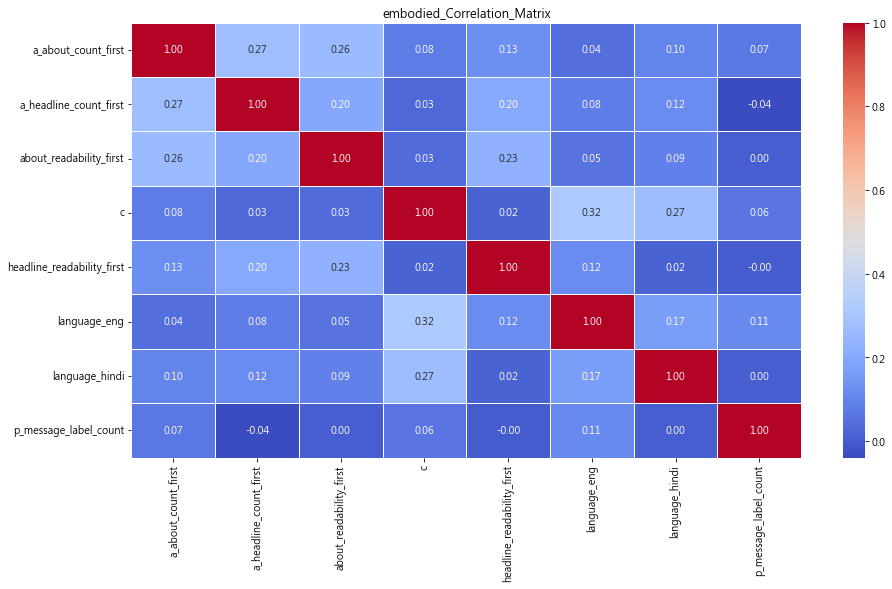

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 定义自变量和因变量
X = embodied_df.drop(columns=["cluster","link"])  # 自变量
# X = embodied_df.drop(columns=["link"])  # 自变量
# y = embodied_df["cluster"]  # 因变量

# 计算相关系数矩阵
correlation_matrix = X.corr()

# 绘制相关系数矩阵图
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.xticks(rotation=45)
plt.title("embodied_Correlation_Matrix")
plt.show()


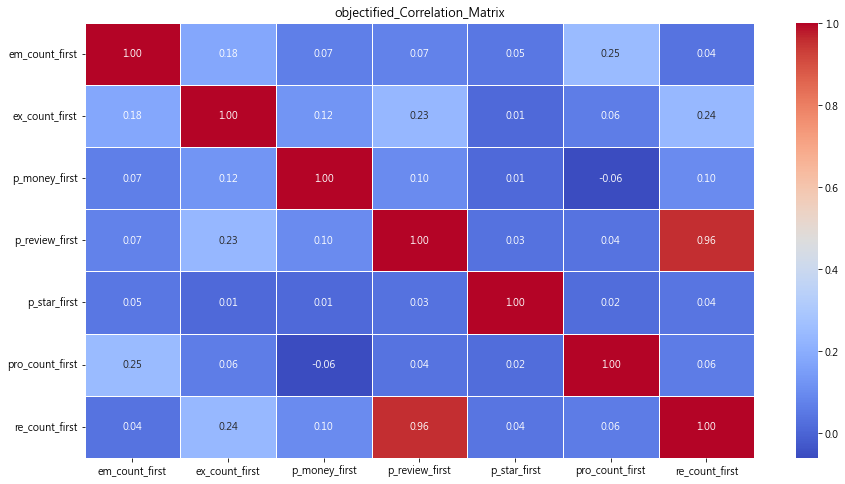

In [32]:

# 定义自变量和因变量
X = objectified_df.drop(columns=["cluster","link"])  # 自变量
y = objectified_df["cluster"]  # 因变量

# 计算相关系数矩阵
correlation_matrix = X.corr()

# 绘制相关系数矩阵图
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.xticks(rotation=45)
plt.title("objectified_Correlation_Matrix")
plt.show()


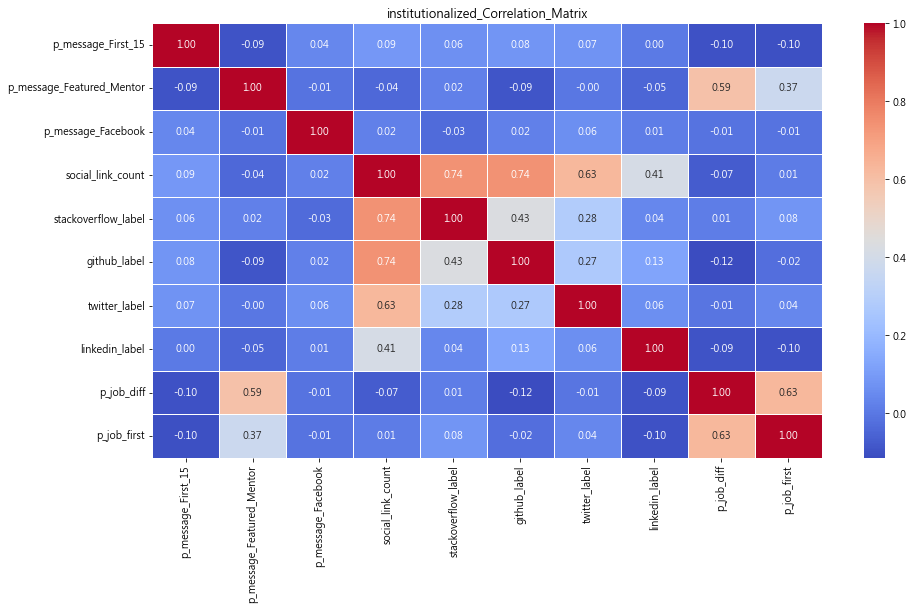

In [33]:

# 定义自变量和因变量
X = institutionalized_df.drop(columns=["cluster","link"])  # 自变量
y = institutionalized_df["cluster"]  # 因变量

# 计算相关系数矩阵
correlation_matrix = X.corr()

# 绘制相关系数矩阵图
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.xticks(rotation=15)
plt.title("institutionalized_Correlation_Matrix")
plt.show()


<h1 align='center'>embodied 資本 PCA分析</h1>

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 提取特征列
# 提取特征列
# features = embodied_df.columns[1:]  # 假设第一列是链接，我们不使用链接进行PCA
features = embodied_df.columns.drop(['cluster','link'])
# 对数据进行标准化处理
scaler = StandardScaler()
embodied_scaled_data = scaler.fit_transform(embodied_df[features])

# 应用PCA
embodied_pca = PCA()
embodied_pca.fit(embodied_scaled_data)

# 获取每个主成分的解释方差比例
explained_variance_ratio = embodied_pca.explained_variance_ratio_.round(3)

# 创建DataFrame来存储主成分及其解释方差比例
embodied_pc_df = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                      'Explained Variance Ratio': explained_variance_ratio})

# 按照解释方差比例由高到低排序
embodied_pc_df = embodied_pc_df.sort_values(by='Explained Variance Ratio', ascending=False)

# 打印排名表格
embodied_pc_df

,Principal Component,Explained Variance Ratio
0,1,0.227
1,2,0.171
2,3,0.128
3,4,0.117
4,5,0.100
5,6,0.095
6,7,0.085
7,8,0.078


In [35]:
embodied_loadings = pd.DataFrame(embodied_pca.components_, columns=features)

# 打印主成分载荷矩阵
embodied_loadings

,a_about_count_first,a_headline_count_first,about_readability_first,c,headline_readability_first,language_eng,language_hindi,p_message_label_count
0,0.422219,0.417837,0.409978,0.333526,0.347933,0.350656,0.339862,0.091099
1,0.263170,0.303411,0.329012,-0.539992,0.282640,-0.446942,-0.338546,-0.211156
2,0.135528,-0.155370,0.051421,-0.123237,0.114548,0.117626,-0.390754,0.871788
3,-0.490067,-0.104940,0.004640,0.009679,0.669150,0.394614,-0.310056,-0.221562
4,-0.084873,-0.663473,0.671194,0.071836,0.051576,-0.217317,0.216397,-0.014945
5,-0.380435,0.168523,-0.158974,-0.322457,0.321758,-0.274650,0.638157,0.333786
6,0.418884,-0.308284,-0.459383,0.351613,0.479867,-0.402574,0.005139,-0.049692
7,0.408095,-0.366833,-0.184924,-0.590862,0.041399,0.472230,0.258763,-0.154609


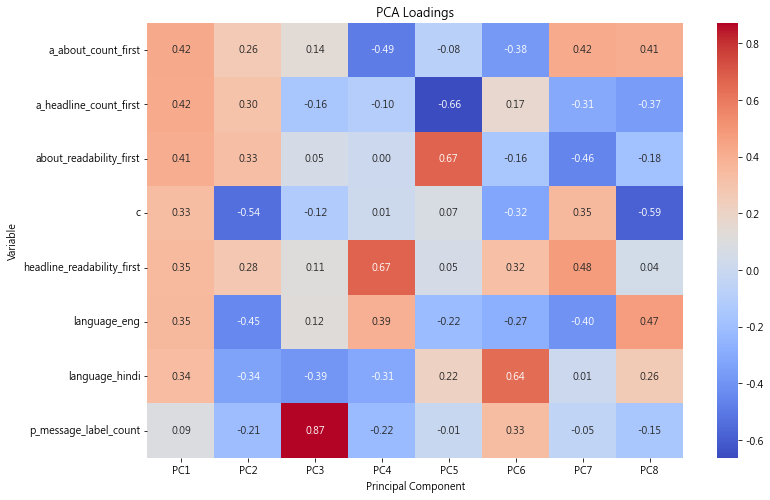

In [36]:
X = embodied_df.drop(columns=["cluster","link"])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
pca = PCA()
pca.fit(scaled_data)

# 获取成分加载
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# 绘制成分加载的热力图
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Variable')
plt.show()

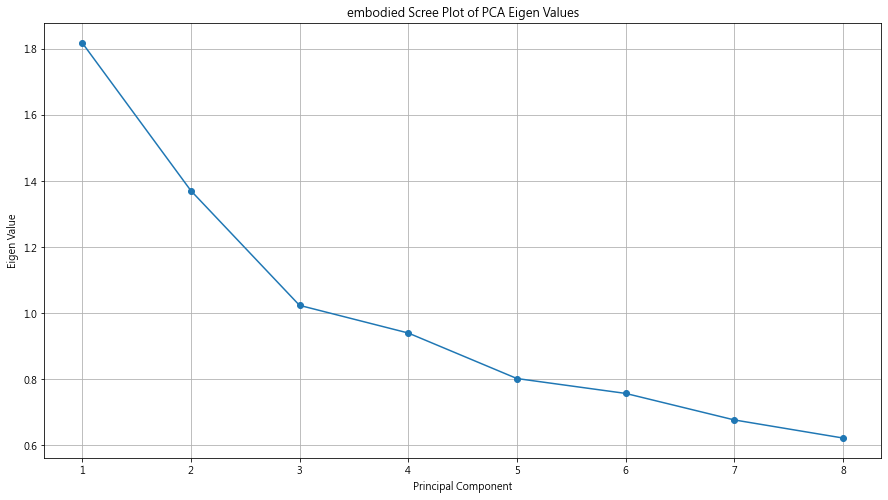

In [37]:
import numpy as np

# 提取PCA模型的explained variance
eigen_values = embodied_pca.explained_variance_

# 將eigen value繪製成圖表
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, marker='o', linestyle='-')
plt.title('embodied Scree Plot of PCA Eigen Values')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Value')
plt.grid(True)
plt.show()


In [38]:
eigen_values

array([1.81757759, 1.37034153, 1.02337001, 0.93974627, 0.80208332,
       0.75710703, 0.67690936, 0.62219977])

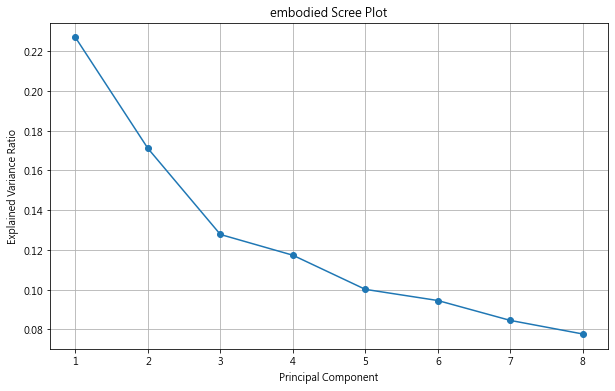

In [39]:
X = embodied_df.drop(columns=["cluster","link"])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
pca = PCA()
pca.fit(scaled_data)

# 绘制 Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('embodied Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

<h1 align='center'>objectified 資本 PCA分析</h1>

In [40]:
# features = objectified_df.columns[1:]  # 假设第一列是链接，我们不使用链接进行PCA
features = objectified_df.columns.drop(['cluster', 'link'])
# 对数据进行标准化处理
scaler = StandardScaler()
objectified_scaled_data = scaler.fit_transform(objectified_df[features])

# 应用PCA
objectified_pca = PCA()
objectified_pca.fit(objectified_scaled_data)

# 获取每个主成分的解释方差比例
objectified_explained_variance_ratio = objectified_pca.explained_variance_ratio_.round(3)

# 创建DataFrame来存储主成分及其解释方差比例
objectified_pc_df = pd.DataFrame({'Principal Component': range(1, len(objectified_explained_variance_ratio) + 1),
                      'Explained Variance Ratio': objectified_explained_variance_ratio})

# 按照解释方差比例由高到低排序
objectified_pc_df = objectified_pc_df.sort_values(by='Explained Variance Ratio', ascending=False)

# 打印排名表格
objectified_pc_df

,Principal Component,Explained Variance Ratio
0,1,0.302
1,2,0.181
2,3,0.150
3,4,0.142
4,5,0.117
5,6,0.101
6,7,0.006


In [41]:
objectified_df.to_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\objectified_df.csv", index=False)

In [42]:
objectified_loadings = pd.DataFrame(objectified_pca.components_, columns=features)

# 打印主成分载荷矩阵
objectified_loadings

,em_count_first,ex_count_first,p_money_first,p_review_first,p_star_first,pro_count_first,re_count_first
0,0.147610,0.319023,0.152909,0.648523,0.056759,0.097431,0.647887
1,0.679527,0.262289,0.011795,-0.190099,0.116997,0.616220,-0.199387
2,0.100437,0.349968,0.817422,-0.161513,0.000690,-0.380116,-0.169356
3,0.039136,0.129932,-0.016836,0.005219,-0.986465,0.090340,-0.001311
4,-0.020072,0.752094,-0.527435,-0.095555,0.073656,-0.362906,-0.097510
5,0.709387,-0.352619,-0.172683,0.101511,-0.067159,-0.570925,0.042896
6,0.034673,-0.009177,-0.003288,-0.705500,-0.006445,-0.021784,0.707429


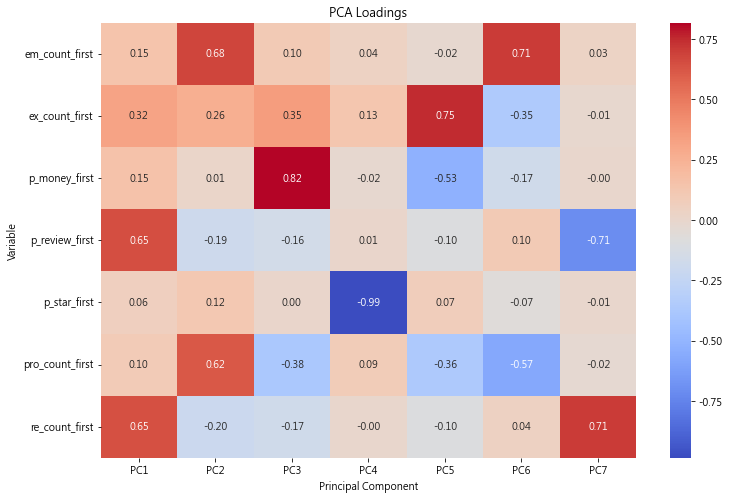

In [43]:
X = objectified_df.drop(columns=["cluster","link"])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
objectified_pca = PCA()
objectified_pca.fit(scaled_data)

# 获取成分加载
loadings = pd.DataFrame(objectified_pca.components_.T, columns=[f'PC{i+1}' for i in range(objectified_pca.n_components_)], index=X.columns)

# 绘制成分加载的热力图
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Variable')
plt.show()

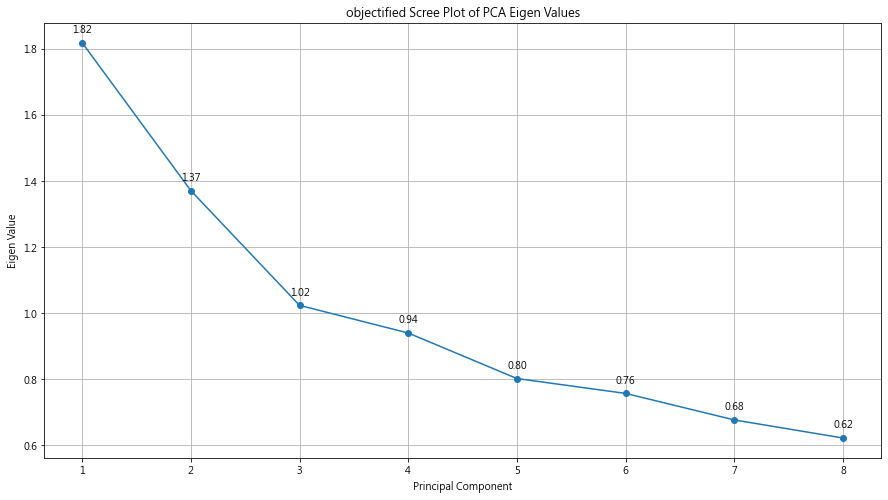

In [44]:
X = objectified_df.drop(columns=["cluster","link"])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
objectified_pca = PCA()
objectified_pca.fit(scaled_data)

# 绘制 Scree plot
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, marker='o', linestyle='-')
plt.title('objectified Scree Plot of PCA Eigen Values')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Value')
plt.grid(True)

# 添加數值標籤
for i, (x, y) in enumerate(zip(range(1, len(eigen_values) + 1), eigen_values)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


<h1 align='center'>institutional 資本 PCA分析</h1>

In [45]:
# features = institutionalized_df.columns[1:]  # 假设第一列是链接，我们不使用链接进行PCA
features = institutionalized_df.columns.drop(['cluster', 'link','p_job_diff'])
# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(institutionalized_df[features])

# 应用PCA
institutional_pca = PCA()
institutional_pca.fit(scaled_data)

# 获取每个主成分的解释方差比例
institutionalized_explained_variance_ratio = pca.explained_variance_ratio_.round(3)

# 创建DataFrame来存储主成分及其解释方差比例
institutionalized_pc_df = pd.DataFrame({'Principal Component': range(1, len(institutionalized_explained_variance_ratio) + 1),
                      'Explained Variance Ratio': institutionalized_explained_variance_ratio})

# 按照解释方差比例由高到低排序
institutionalized_pc_df = institutionalized_pc_df.sort_values(by='Explained Variance Ratio', ascending=False)

# 打印排名表格
institutionalized_pc_df

,Principal Component,Explained Variance Ratio
0,1,0.227
1,2,0.171
2,3,0.128
3,4,0.117
4,5,0.100
5,6,0.095
6,7,0.085
7,8,0.078


In [46]:
institutionalized_df.to_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\institutionalized_df.csv", index=False)

In [47]:
institutionalized_loadings = pd.DataFrame(institutional_pca.components_, columns=features)

# 打印主成分载荷矩阵
institutionalized_loadings

,p_message_First_15,p_message_Featured_Mentor,p_message_Facebook,social_link_count,stackoverflow_label,github_label,twitter_label,linkedin_label,p_job_first
0,-0.091360,0.046797,-0.023753,-0.606232,-0.456280,-0.467621,-0.388252,-0.209212,0.003323
1,-0.263933,0.642644,-0.062730,0.023834,0.150092,-0.036825,0.078977,-0.183894,0.670005
2,0.552970,0.021433,0.615562,-0.077630,0.024660,-0.007306,0.209507,-0.506475,0.088034
3,-0.281436,0.135765,0.712507,0.053694,-0.243442,-0.089142,0.042969,0.567606,0.024073
4,-0.729054,-0.321589,0.229882,-0.011549,0.118162,0.134600,0.105670,-0.502863,-0.126350
5,0.049673,0.014066,0.219686,-0.012567,0.313530,0.384079,-0.834985,0.001430,0.076782
6,0.054602,-0.658258,-0.025445,-0.012487,-0.159271,0.037865,0.009830,0.123932,0.721565
7,0.006084,0.170312,-0.084632,-0.023622,-0.669179,0.707467,0.053868,-0.108572,-0.015403
8,-0.002502,0.000389,0.000351,-0.788670,0.352105,0.323107,0.293119,0.252387,0.000331


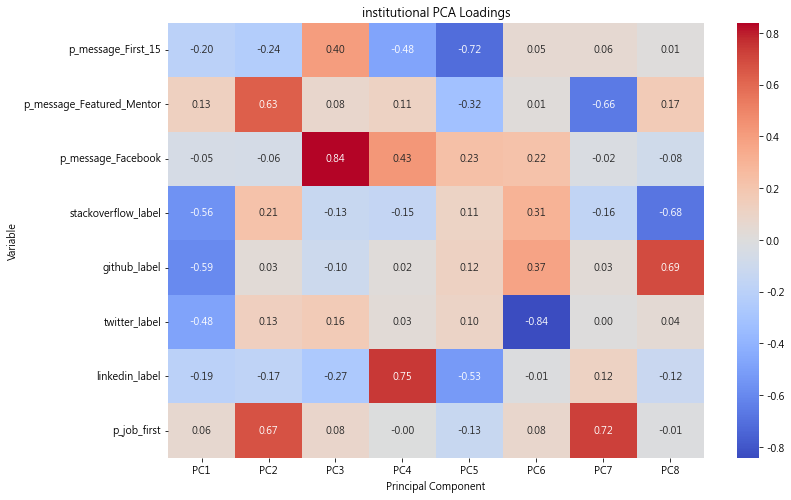

In [48]:
X = institutionalized_df.drop(columns=["cluster","link",'p_job_diff','social_link_count'])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
institutional_pca = PCA()
institutional_pca.fit(scaled_data)

# 获取成分加载
loadings = pd.DataFrame(institutional_pca.components_.T, columns=[f'PC{i+1}' for i in range(institutional_pca.n_components_)], index=X.columns)

# 绘制成分加载的热力图
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('institutional PCA Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Variable')
plt.show()

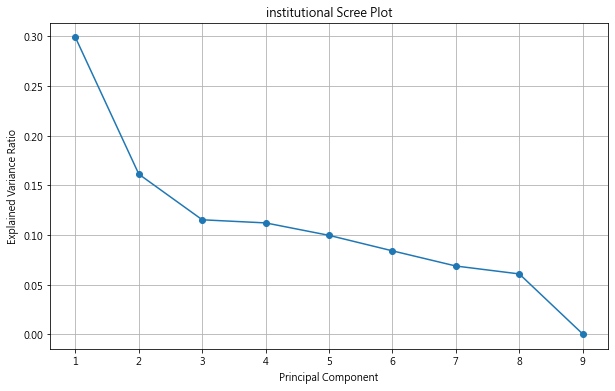

In [49]:
X = institutionalized_df.drop(columns=["cluster","link",'p_job_diff'])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
institutional_pca = PCA()
institutional_pca.fit(scaled_data)

# 绘制 Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, institutional_pca.n_components_ + 1), institutional_pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('institutional Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, institutional_pca.n_components_ + 1))
plt.grid(True)
plt.show()

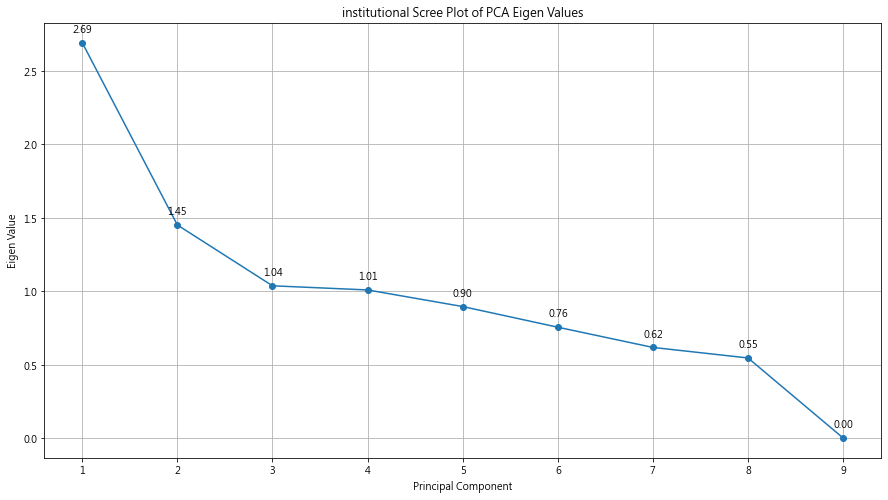

In [50]:
import numpy as np

# 提取PCA模型的explained variance
eigen_values = institutional_pca.explained_variance_

# 將eigen value繪製成圖表
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, marker='o', linestyle='-')
plt.title('institutional Scree Plot of PCA Eigen Values')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Value')
plt.grid(True)

# 添加數值標籤
for i, (x, y) in enumerate(zip(range(1, len(eigen_values) + 1), eigen_values)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



<h1 align='center'>merged_data PCA分析</h1>

In [51]:
merged_df = pd.merge(institutionalized_df, objectified_df, on='link', how='inner')

# 再將 embodied_df 合併
merged_df = pd.merge(merged_df, embodied_df, on='link', how='inner')

In [73]:
merged_df.columns.tolist()

['link',
 'p_message_First_15',
 'p_message_Featured_Mentor',
 'p_message_Facebook',
 'social_link_count',
 'stackoverflow_label',
 'github_label',
 'twitter_label',
 'linkedin_label',
 'p_job_diff',
 'p_job_first',
 'cluster_x',
 'cluster_y',
 'em_count_first',
 'ex_count_first',
 'p_money_first',
 'p_review_first',
 'p_star_first',
 'pro_count_first',
 're_count_first',
 'a_about_count_first',
 'a_headline_count_first',
 'about_readability_first',
 'c',
 'cluster',
 'headline_readability_first',
 'language_eng',
 'language_hindi',
 'p_message_label_count']

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 提取需要用於聚類的特徵
X = merged_df.columns.tolist()
# 創建 K-means 聚類器
kmeans = KMeans(n_clusters=4, random_state=42)

# 進行聚類
diff_df['cluster'] = kmeans.fit_predict(X)

# 繪製聚類結果的散點圖
plt.scatter(diff_df['log_p_job_first'], diff_df['log_p_job_diff'], c=diff_df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Cluster Analysis of p_job_first vs p_job_diff')
plt.xlabel('p_job_first')
plt.ylabel('p_job_diff')
plt.legend()
plt.show()


ValueError: could not convert string to float: 'link'

In [53]:
# features = institutionalized_df.columns[1:]  # 假设第一列是链接，我们不使用链接进行PCA
features = merged_df.columns.drop(['cluster', 'link','p_job_diff','cluster_x','cluster_y'])
# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[features])

# 应用PCA
merged_pca = PCA()
merged_pca.fit(scaled_data)

# 获取每个主成分的解释方差比例
merged_explained_variance_ratio = pca.explained_variance_ratio_.round(3)

# 创建DataFrame来存储主成分及其解释方差比例
merged_pc_df = pd.DataFrame({'Principal Component': range(1, len(merged_explained_variance_ratio) + 1),
                      'Explained Variance Ratio': merged_explained_variance_ratio})
# # 按照解释方差比例由高到低排序
merged_pc_df = merged_pc_df.sort_values(by='Explained Variance Ratio', ascending=False)

# 打印排名表格
merged_pc_df

,Principal Component,Explained Variance Ratio
0,1,0.227
1,2,0.171
2,3,0.128
3,4,0.117
4,5,0.100
5,6,0.095
6,7,0.085
7,8,0.078


<h2>匯出檔案</h2>


In [54]:
# merged_df[['log_p_job_first', 'log_p_job_diff']] = np.log(merged_df[['p_job_first', 'p_job_diff']])
# merged_df.drop(columns=['cluster_x', 'cluster_y'], inplace=True)
# merged_df.to_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\merged_df_0411.csv", index=False)

In [55]:
merged_loadings = pd.DataFrame(merged_pca.components_, columns=features)

# 打印主成分载荷矩阵
merged_loadings

,p_message_First_15,p_message_Featured_Mentor,p_message_Facebook,social_link_count,stackoverflow_label,github_label,twitter_label,linkedin_label,p_job_first,em_count_first,...,pro_count_first,re_count_first,a_about_count_first,a_headline_count_first,about_readability_first,c,headline_readability_first,language_eng,language_hindi,p_message_label_count
0,0.014241,0.219982,0.010227,0.245329,0.225551,0.158582,0.191160,0.026377,0.420157,0.156013,...,0.116452,0.423705,0.211277,0.131671,0.075472,0.095048,0.095094,0.170638,0.068696,0.131416
1,-0.125840,0.198395,-0.028280,-0.455069,-0.308596,-0.361742,-0.286749,-0.197783,0.298295,-0.194265,...,-0.160239,0.289066,0.002201,-0.052773,-0.094681,-0.161091,-0.054342,-0.126285,-0.110651,-0.015615
2,0.615634,0.197876,0.083934,-0.016883,0.011765,-0.014174,0.016263,-0.064910,-0.025803,-0.092385,...,-0.145066,-0.027650,-0.082810,-0.192240,-0.130423,0.054199,-0.103052,0.073580,-0.025667,0.662736
3,0.172821,-0.042522,0.056707,-0.244904,-0.199128,-0.230746,-0.084738,-0.088801,-0.129709,0.123712,...,-0.004235,-0.134982,0.339230,0.399811,0.413626,0.106284,0.335418,0.109940,0.157340,0.139520
4,-0.136810,0.096808,-0.080240,-0.099842,-0.079053,-0.118071,0.001410,-0.048369,-0.012053,-0.130474,...,-0.017716,0.005638,-0.079719,-0.086634,-0.118275,0.576227,-0.133144,0.437228,0.535506,-0.085399
5,-0.033586,-0.124696,-0.045550,0.005921,0.196136,0.052982,0.166246,-0.511429,-0.013111,-0.236300,...,-0.370754,-0.044316,0.001742,-0.060487,-0.066425,0.092772,0.145991,0.218815,-0.167054,-0.096023
6,-0.106858,-0.062918,0.633091,0.019761,0.014368,0.028336,0.110580,-0.126731,0.031749,-0.171913,...,0.102068,0.029439,0.108523,-0.038521,0.037449,0.059124,-0.227474,-0.048800,0.102836,-0.089294
7,-0.029468,-0.025824,0.514686,-0.027388,-0.265428,-0.072007,0.050347,0.315052,-0.013565,0.254494,...,-0.168344,-0.007275,-0.290548,0.157796,-0.336546,0.066930,-0.010807,0.184222,-0.153413,-0.005840
8,0.077958,-0.176767,0.146468,-0.181798,-0.053731,0.012627,-0.085581,-0.412501,0.045573,0.381235,...,0.583050,0.018339,-0.159614,-0.273160,0.108107,0.084554,0.053988,0.184707,-0.208979,0.003437
9,0.158281,-0.413258,-0.215335,-0.003617,-0.053489,0.017561,-0.131051,0.201574,0.154652,0.164802,...,-0.165498,0.129932,-0.246782,0.000249,-0.144226,0.062199,0.420323,0.164185,0.018374,-0.083416


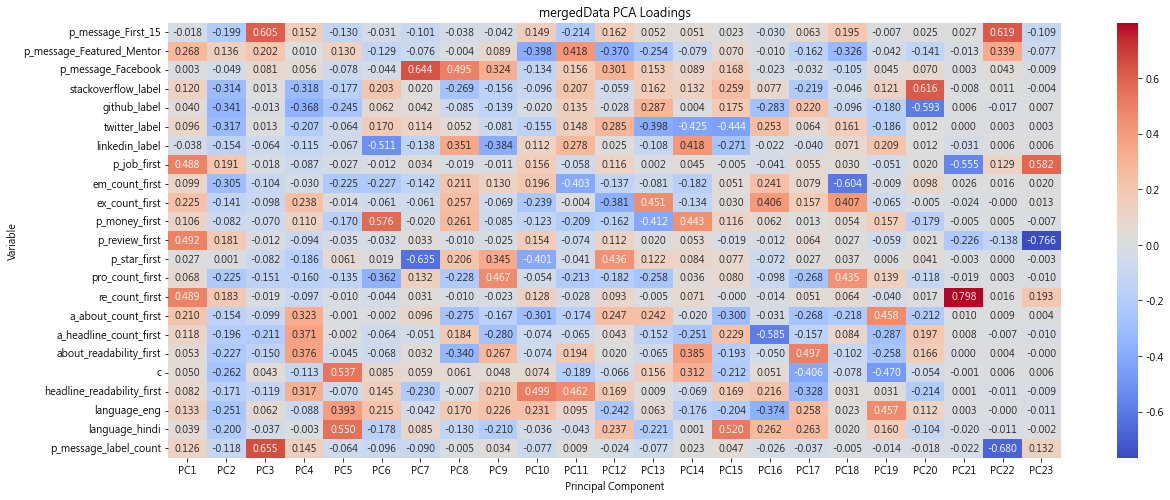

In [56]:
X = merged_df.drop(columns=["cluster","link",'p_job_diff','social_link_count','cluster_x','cluster_y'])  # 自变量

# 对数据进行标准化处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# 应用PCA
merged_pca = PCA()
merged_pca.fit(scaled_data)

# 获取成分加载
loadings = pd.DataFrame(merged_pca.components_.T, columns=[f'PC{i+1}' for i in range(merged_pca.n_components_)], index=X.columns)

# 绘制成分加载的热力图
plt.figure(figsize=(20, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".3f")
plt.title('mergedData PCA Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Variable')
plt.show()

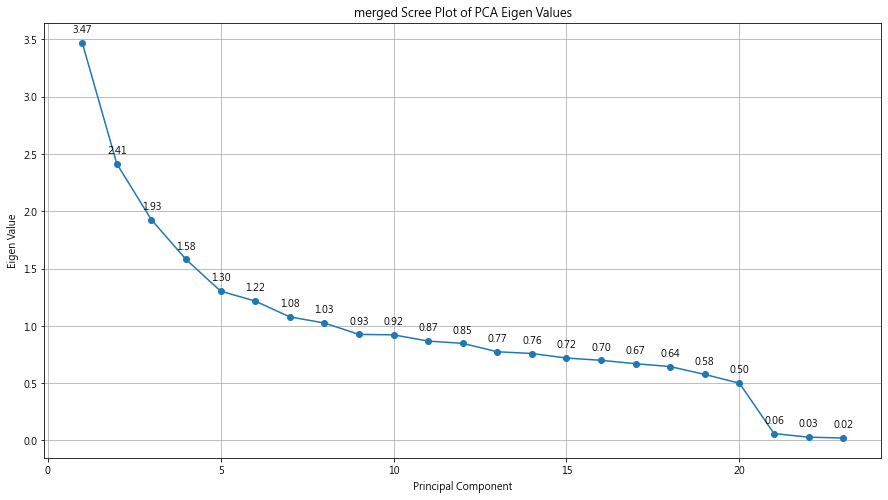

In [57]:
import numpy as np

# 提取PCA模型的explained variance
eigen_values = merged_pca.explained_variance_

# 將eigen value繪製成圖表
plt.figure(figsize=(15, 8))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, marker='o', linestyle='-')
plt.title('merged Scree Plot of PCA Eigen Values')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Value')
plt.grid(True)

# 添加數值標籤
for i, (x, y) in enumerate(zip(range(1, len(eigen_values) + 1), eigen_values)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



<h1 align='center'>discrimnant analysis</h1>

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# np.set_printoptions(suppress=True, precision=3)

<h1>merged_pca_df 區別分析</h1>

In [123]:
merged_pca_df = pd.read_csv(r"C:\Users\Modern 14\Desktop\codementorAll\test\Merge_Sep_02.csv")

In [124]:
merged_pca_df.columns.tolist()

['cluster',
 'link',
 'Language2',
 'Introduction2',
 'Label2',
 'Review2',
 'EM_PROJ2',
 'Expertise2',
 'Money2',
 'Internal2',
 'Extenal2']

c:\Users\Modern 14\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


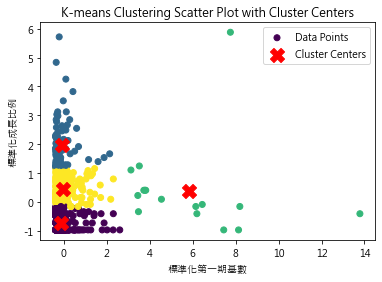

In [126]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 選擇要標準化的特徵
# selected_features = ['Language2', 'Introduction2', 'Label2', 'Review2', 'EM_PROJ2', 'Expertise2', 'Money2', 'Internal2',
#                      'Extenal2']

selected_features = ['Review2', 'EM_PROJ2']

# 創建 StandardScaler 對象
scaler = StandardScaler()

# 對選擇的特徵進行標準化
scaled_features = scaler.fit_transform(merged_pca_df[selected_features])

# K-means叢集分析
kmeans = KMeans(n_clusters=4, random_state=42)
merged_pca_df['cluster'] = kmeans.fit_predict(scaled_features)

# 繪製散點圖
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_pca_df['cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering Scatter Plot with Cluster Centers')
plt.xlabel('標準化第一期基數')
plt.ylabel('標準化成長比例')
plt.legend()
plt.show()


In [127]:

# 定義自變量和因變量
X = merged_pca_df.drop(columns=['link', 'cluster'])  # 自變量
y = merged_pca_df['cluster']  # 因變量
features = X.columns
LDA=LinearDiscriminantAnalysis(n_components=3)
lda_x=LDA.fit_transform(X,y)

LDA.explained_variance_ratio_
np.cumsum(LDA.explained_variance_ratio_)

array([0.64708246, 0.99549866, 1.        ])

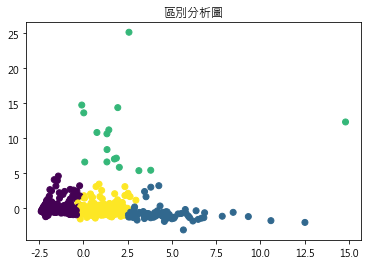

In [128]:
plt.title('區別分析圖')
plt.scatter(lda_x[:,0], lda_x[:,1], c = y)

explained variance ratio (first two components): [0.63322959 0.31122016 0.01360598]


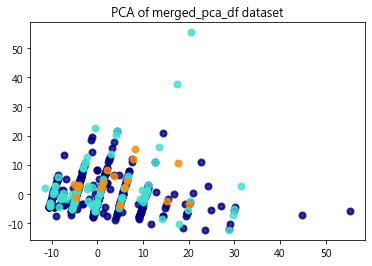

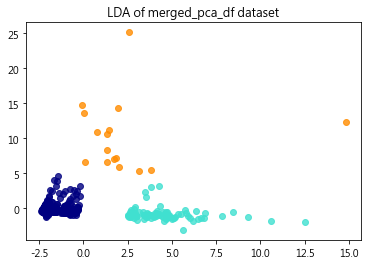

In [129]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X = merged_pca_df.drop(columns=['link', 'cluster'])  # 自變量
y = merged_pca_df['cluster']  # 因變量
target_names = merged_pca_df.columns

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of merged_pca_df dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of merged_pca_df dataset")

plt.show()

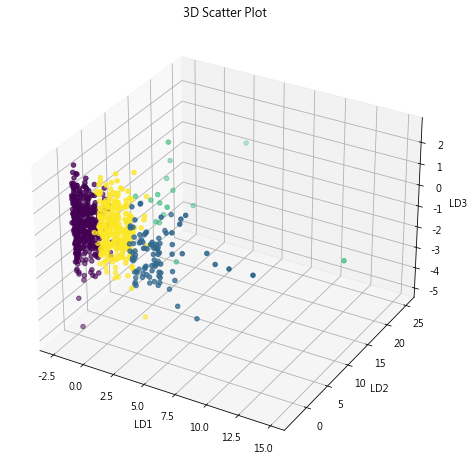

In [130]:
from mpl_toolkits.mplot3d import Axes3D

# 创建一个大尺寸的三维图形对象
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
ax.scatter(lda_x[:, 0], lda_x[:, 1], lda_x[:, 2], c=y, cmap='viridis')

# 设置图形标题和轴标签
ax.set_title('3D Scatter Plot')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')

# 显示图形
plt.show()


In [65]:
# 提取LDA模型的主成分係數
components = LDA.coef_

# 創建包含係數的DataFrame

merged_component_df = pd.DataFrame(components, columns=features, index=[f'LD{i+1}' for i in range(components.shape[0])])

# 印出主成分係數
merged_component_df



,Language2,Introduction2,Label2,Review2,EM_PROJ2,Expertise2,Money2,Internal2,Extenal2
LD1,-0.062977,0.020858,-0.566300,-0.079952,0.076900,0.000866,0.003207,-0.246826,0.145561
LD2,-0.159963,0.057342,-0.150397,-0.334558,-0.156035,-0.037987,0.000582,-0.470150,0.041020
LD3,0.193105,-0.006007,1.198968,0.784448,0.113327,0.055024,0.015139,1.039513,-0.176184
LD4,0.065947,-0.087290,-0.316174,-0.328960,-0.043818,-0.015228,-0.020784,-0.215447,-0.059164


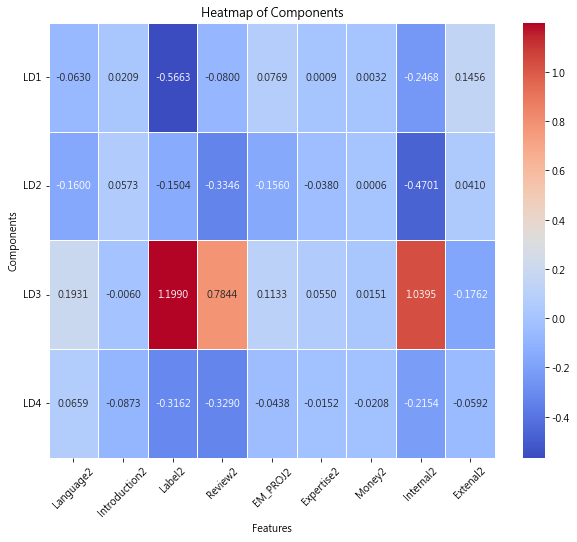

In [66]:
# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(merged_component_df, cmap='coolwarm', annot=True, fmt=".4f", linewidths=0.5)
plt.title('Heatmap of Components')
plt.xlabel('Features')
plt.ylabel('Components')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便于阅读
plt.yticks(rotation=0)   # 旋转 y 轴标签以便于阅读
plt.show()


In [67]:
# 創建係數和變數名稱的對應表
coef_df_1 = pd.DataFrame({'Feature': features, 'Coefficient_1': LDA.coef_[0]})
coef_df_2 = pd.DataFrame({'Feature': features, 'Coefficient_2': LDA.coef_[1]})
coef_df_3 = pd.DataFrame({'Feature': features, 'Coefficient_3': LDA.coef_[2]})
coef_df_4 = pd.DataFrame({'Feature': features, 'Coefficient_4': LDA.coef_[3]})

# 合併所有係數和變數名稱的對應表
all_coef_df = pd.merge(coef_df_1, coef_df_2, on='Feature')
all_coef_df = pd.merge(all_coef_df, coef_df_3, on='Feature')
all_coef_df = pd.merge(all_coef_df, coef_df_4, on='Feature')

# 印出係數和變數名稱對應表
all_coef_df.round(3)


,Feature,Coefficient_1,Coefficient_2,Coefficient_3,Coefficient_4
0,Language2,-0.063,-0.160,0.193,0.066
1,Introduction2,0.021,0.057,-0.006,-0.087
2,Label2,-0.566,-0.150,1.199,-0.316
3,Review2,-0.080,-0.335,0.784,-0.329
4,EM_PROJ2,0.077,-0.156,0.113,-0.044
5,Expertise2,0.001,-0.038,0.055,-0.015
6,Money2,0.003,0.001,0.015,-0.021
7,Internal2,-0.247,-0.470,1.040,-0.215
8,Extenal2,0.146,0.041,-0.176,-0.059


In [68]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm


# # 定义自变量和因变量
# X = merged_df.drop(columns=["p_job_diff","link","cluster_x",'cluster_y'])  # 自变量
# y = merged_df["cluster"]  # 因变量

# # 前向逐步选择
# def forward_stepwise_selection(X, y):
#     initial_features = X.columns.tolist()
#     best_features = []
#     all_features = []
#     while (len(initial_features)>0):
#         remaining_features = list(set(initial_features)-set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value<0.05):
#             best_feature = new_pval.idxmin()
#             best_features.append(best_feature)
#             all_features.append(best_features.copy())
#         else:
#             break
#     return all_features

# selected_features_history = forward_stepwise_selection(X, y)
# for i, features in enumerate(selected_features_history):
#     print(f"Step {i+1}: {features}")

In [69]:
# import statsmodels.api as sm


# # 定义自变量和因变量
# X = institutionalized_df.drop(columns=["p_job_diff","link","cluster"])  # 自变量
# y = institutionalized_df["cluster"]  # 因变量

# # 后向逐步选择
# def backward_stepwise_selection(X, y):
#     features = X.columns.tolist()
#     while (len(features) > 0):
#         X_subset = X[features]
#         model = sm.OLS(y, sm.add_constant(X_subset)).fit()
#         p_values = model.pvalues.drop('const')
#         max_p_value = p_values.max()
#         if max_p_value > 0.05:
#             remove_feature = p_values.idxmax()
#             features.remove(remove_feature)
#         else:
#             break
#     return features

# selected_features = backward_stepwise_selection(X, y)
# print("Selected features:", selected_features)


<h1>stepwise Selection</h1>

In [70]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm


# # 定义自变量和因变量
# X = diff_df.drop(columns=["p_job_diff","link","cluster"])  # 自变量
# y = diff_df["cluster"]  # 因变量

# # 前向逐步选择
# def forward_stepwise_selection(X, y):
#     initial_features = X.columns.tolist()
#     best_features = []
#     all_features = []
#     while (len(initial_features)>0):
#         remaining_features = list(set(initial_features)-set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value<0.05):
#             best_feature = new_pval.idxmin()
#             best_features.append(best_feature)
#             all_features.append(best_features.copy())
#         else:
#             break
#     return all_features

# selected_features_history = forward_stepwise_selection(X, y)
# for i, features in enumerate(selected_features_history):
#     print(f"Step {i+1}: {features}")

In [71]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm

# # 加载数据到 DataFrame


# # 定义自变量和因变量
# X = diff_df.drop(columns=["p_job_diff","link"])  # 自变量
# y = diff_df["p_job_diff"]  # 因变量

# # 前向逐步选择
# def forward_stepwise_selection(X, y):
#     initial_features = X.columns.tolist()
#     best_features = []
#     while (len(initial_features) > 0):
#         remaining_features = list(set(initial_features) - set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value < 0.05):
#             best_feature = new_pval.idxmin()
#             best_features.append(best_feature)
#             # 输出当前步骤的模型系数
#             print("Step:", len(best_features))
#             print(model.params)
#         else:
#             break
#     return best_features

# selected_features = forward_stepwise_selection(X, y)

In [72]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# diff_df

# # 定义自变量（不包括目标变量）
# X = diff_df.drop(columns=["p_job_diff","link"])  

# # 计算 VIF
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # 打印结果
# vif_data